# Шлях вантажеперевізок Нова Пошта
1. Повний граф.
2. Неорієнтований граф.Напрямок перевезень не має значення.
3. 6 Вершин: A...F. 6 міст призначеннь.
4. Ступень кожної вершини рівна 5.
5. Кількість ребер рівна 15

#Завдання 1

['A', 'B', 'C', 'D', 'E', 'F']
[('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('A', 'F'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('B', 'F'), ('C', 'D'), ('C', 'E'), ('C', 'F'), ('D', 'E'), ('D', 'F'), ('E', 'F')]


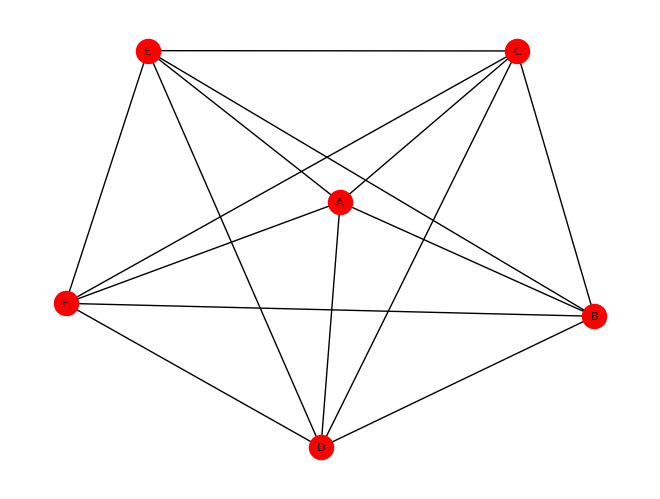

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Шлях вантажеперевізок Нова Пошта
D=nx.complete_graph(list(chr(i).upper() for i in range(97,97+6)))
nx.draw(D, with_labels=True, node_color='red',font_size=8)
print(D.nodes())
print(D.edges())

#Завдання 2

Алгоритм DFS реалізован через рекурсію

In [ ]:
def dfs_recursive(graph, vertex, visited=None):
    if visited is None:
        visited = set()
    visited.add(vertex)
    print(vertex, end=' ')  # Відвідуємо вершину
    for neighbor in graph[vertex]:
        if neighbor not in visited:
            dfs_recursive(graph, neighbor, visited)

# Виклик функції DFS
dfs_recursive(D, 'C')

C A B D E F 

Алгоритм BFS реалізован через рекурсію

In [ ]:
from collections import deque

def bfs_recursive(graph, queue, visited=None):
    # Перевіряємо, чи існує множина відвіданих вершин, якщо ні, то ініціалізуємо нову
    if visited is None:
        visited = set()
    # Якщо черга порожня, завершуємо рекурсію
    if not queue:
        return
    # Вилучаємо вершину з початку черги
    vertex = queue.popleft()
    # Перевіряємо, чи відвідували раніше дану вершину
    if vertex not in visited:
        # Якщо не відвідували, друкуємо вершину
        print(vertex, end=" ")
        # Додаємо вершину до множини відвіданих вершин.
        visited.add(vertex)
        # Додаємо невідвіданих сусідів даної вершини в кінець черги.
        queue.extend(set(graph[vertex]) - visited)
    # Рекурсивний виклик функції з тією ж чергою та множиною відвіданих вершин
    bfs_recursive(graph, queue, visited)

# Виклик функції DFS
bfs_recursive(D, deque(["C"]))


C F D A E B 

#Висновок по завданню 2:
Алгоритм DFS, який реалізован через рекурсію, послідовно відвідує всі вершини, починаючи з вхідної вершини. Потім задопомогаю рекурсії відвідуєтся всі сусідні вершини, які не були відвідані

Алгоритм BFS, який реалізован через рекурсію,відвідує всі вершини на певному рівні перед тим, як перейти до наступного рівня.

Різниця між алгоритмами:

Алгоритм DFS.

Переваги:
Алгоритм DFS може бути ефективним для знаходження циклу у графі або перевірки зв'язності графу.
DFS є більш економним за обсягом використовуваної пам'яті.

Недоліки:
DFS може бути неефективним для пошуку найкоротшого шляху у графі, особливо у графах з великою кількістю вершин та ребер.
Незавжди знаходіть оптимальні рішення у контексті шляху.

Алгоритм BFS.

Переваги:
BFS є корисним для знаходження найкоротшого шляху в незважених графах та при розв'язку завдань, які вимагають відвідування вершин у порядку, віддаленому від вихідної вершини.
BFS систематично оглядає всі можливі шляхи, поки не знайде оптимального рішення.

Недоліки:
Метод BFS вимагає значного обсягу пам'яті для збереження проміжних результатів.

Вибір алгоритму залежіть від конкретного завдання, апаратного забеспечення, системних ресурсів.


#Завдання 3
Алгоритм Дейкстри

In [1]:

import networkx as nx
import matplotlib.pyplot as plt

def dijkstra_path_length(graph,edges):
  D_D=nx.complete_graph(graph)
  raport={}

  for edge in edges:
    D_D.add_edge(edge[0],edge[1], weight=edge[2])

  for node in D_D.nodes():
    raport[node]=nx.single_source_dijkstra_path_length(D_D, node, cutoff=None, weight='weight')
  return raport


graph=['A','B','C','D','E','F']
edges=[['A','B',4],['A','C',2],['A','D',15],['A','E',4],['A','F',15],
 ['B','C',3],['B','D',15],['B','E',8],['B','F',9],
  ['C','D',1],['C','E',9],['C','F',4],
   ['D','E',7],['D','F',2],['E','F',12]]

print(dijkstra_path_length(graph,edges))


{'A': {'A': 0, 'C': 2, 'D': 3, 'B': 4, 'E': 4, 'F': 5}, 'B': {'B': 0, 'C': 3, 'A': 4, 'D': 4, 'F': 6, 'E': 8}, 'C': {'C': 0, 'D': 1, 'A': 2, 'B': 3, 'F': 3, 'E': 6}, 'D': {'D': 0, 'C': 1, 'F': 2, 'A': 3, 'B': 4, 'E': 7}, 'E': {'E': 0, 'A': 4, 'C': 6, 'D': 7, 'B': 8, 'F': 9}, 'F': {'F': 0, 'D': 2, 'C': 3, 'A': 5, 'B': 6, 'E': 9}}
